<a href="https://colab.research.google.com/github/DaiRodri/IA/blob/main/Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sistema de recomendação
# Aqui estamos carregando as imagens prontas de um dataset chamado: fashion
import tensorflow as tf

# Carregar o Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


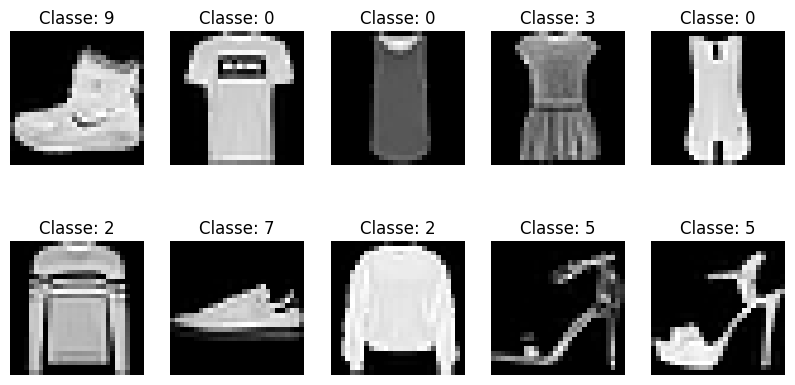

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Mostrar algumas imagens do dataset
def mostrar_imagens(dataset, labels, num_imagens=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_imagens):
        plt.subplot(2, 5, i+1)
        plt.imshow(dataset[i], cmap='gray')
        plt.title(f"Classe: {labels[i]}")
        plt.axis("off")
    plt.show()

# Chamando a função para visualizar os dados
mostrar_imagens(imagens_treino, labels_treino)


In [3]:
# Normalizando os valores dos pixels para o intervalo [0,1]
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir o modelo CNN
modelo = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # Redefinir a forma para (28, 28, 1) para a entrada da CNN
    layers.Conv2D(32, (3, 3), activation='relu'),      # Primeira camada convolucional
    layers.MaxPooling2D((2, 2)),                      # Camada de Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),      # Segunda camada convolucional
    layers.MaxPooling2D((2, 2)),                      # Camada de Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),      # Terceira camada convolucional
    layers.Flatten(),                                 # Achatar as saídas para uma camada densa
    layers.Dense(64, activation='relu'),              # Camada densa
    layers.Dense(10, activation='softmax')            # Camada de saída com 10 classes (uma para cada categoria de roupa)
])

# Compilação do modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Treinar o modelo
historico = modelo.fit(imagens_treino, labels_treino, epochs=5, validation_data=(imagens_teste, labels_teste))

# Avaliar o modelo com os dados de teste
teste_performance = modelo.evaluate(imagens_teste, labels_teste)
print(f"Performance no conjunto de teste: {teste_performance}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.7409 - loss: 0.7046 - val_accuracy: 0.8595 - val_loss: 0.3745
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.8801 - loss: 0.3326 - val_accuracy: 0.8832 - val_loss: 0.3216
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9003 - loss: 0.2738 - val_accuracy: 0.8888 - val_loss: 0.3099
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9112 - loss: 0.2417 - val_accuracy: 0.9005 - val_loss: 0.2681
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9200 - loss: 0.2168 - val_accuracy: 0.8997 - val_loss: 0.2782
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8969 - loss: 0.2858
Performance no conjunto de teste: [0.27821066975593567, 0.8996999859809875]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


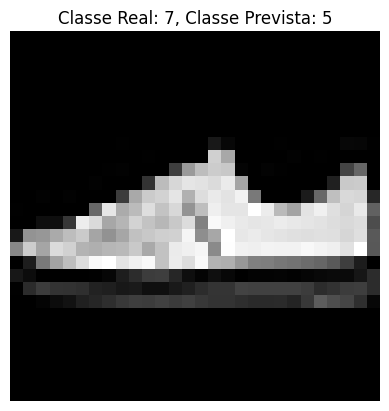

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Função para prever a classe de uma imagem do dataset
def prever_imagem(imagem, modelo):
    # A imagem já está no formato correto (28x28), só precisamos normalizar e adicionar a dimensão de batch
    imagem = imagem / 255.0  # Normaliza a imagem
    imagem = np.expand_dims(imagem, axis=-1)  # Adiciona a dimensão de canal (28, 28, 1)

    # Faz a previsão
    previsao = modelo.predict(np.expand_dims(imagem, axis=0))  # Adiciona a dimensão do batch
    classe_prevista = np.argmax(previsao)  # A classe prevista é o índice com maior valor

    return classe_prevista

# Função para exibir a imagem e a classe prevista
def exibir_imagem_e_classe(imagem, modelo, label_real=None):
    classe_prevista = prever_imagem(imagem, modelo)

    # Exibir a imagem
    plt.imshow(imagem, cmap='gray')
    if label_real is not None:
        plt.title(f'Classe Real: {label_real}, Classe Prevista: {classe_prevista}')
    else:
        plt.title(f'Classe Prevista: {classe_prevista}')
    plt.axis('off')
    plt.show()

# Escolher uma imagem aleatória do conjunto de treino (ou teste)
import random

indice_aleatorio = random.randint(0, len(imagens_treino) - 1)  # Gera um índice aleatório
imagem_aleatoria = imagens_treino[indice_aleatorio]  # Pega a imagem correspondente
label_real = labels_treino[indice_aleatorio]  # Pega o rótulo real da imagem

# Exibir a imagem e a classe prevista
exibir_imagem_e_classe(imagem_aleatoria, modelo, label_real)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


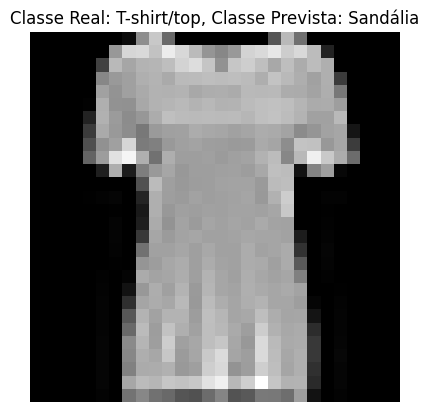

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Dicionário de mapeamento das classes
class_names = ['T-shirt/top', 'Calça', 'Pulôver', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

# Função para prever a classe de uma imagem do dataset
def prever_imagem(imagem, modelo):
    # A imagem já está no formato correto (28x28), só precisamos normalizar e adicionar a dimensão de batch
    imagem = imagem / 255.0  # Normaliza a imagem
    imagem = np.expand_dims(imagem, axis=-1)  # Adiciona a dimensão de canal (28, 28, 1)

    # Faz a previsão
    previsao = modelo.predict(np.expand_dims(imagem, axis=0))  # Adiciona a dimensão do batch
    classe_prevista = np.argmax(previsao)  # A classe prevista é o índice com maior valor

    return classe_prevista

# Função para exibir a imagem e a classe prevista (nome)
def exibir_imagem_e_classe(imagem, modelo, label_real=None):
    classe_prevista = prever_imagem(imagem, modelo)

    # Exibir a imagem com a classe prevista (nome da classe)
    plt.imshow(imagem, cmap='gray')
    if label_real is not None:
        # Exibe tanto a classe real quanto a classe prevista
        plt.title(f'Classe Real: {class_names[label_real]}, Classe Prevista: {class_names[classe_prevista]}')
    else:
        # Exibe apenas a classe prevista
        plt.title(f'Classe Prevista: {class_names[classe_prevista]}')
    plt.axis('off')
    plt.show()

# Função para classificar uma imagem na posição específica (índice n)
def classificar_imagem_por_indice(indice, dataset, labels, modelo):
    # Pega a imagem no índice fornecido
    imagem = dataset[indice]
    label_real = labels[indice]

    # Exibir a imagem e a previsão
    exibir_imagem_e_classe(imagem, modelo, label_real)

# Aqui você pode alterar para qualquer índice da imagem que deseja visualizar
indice_especifico = 10  # Exemplo: Posicionamento da imagem (você pode mudar o valor de `25` para o que quiser)
classificar_imagem_por_indice(indice_especifico, imagens_treino, labels_treino, modelo)
